In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('data/ChatGPT生成文本检测器公开数据-更新/train.csv')
test_data = pd.read_csv('data/ChatGPT生成文本检测器公开数据-更新/test.csv')

In [5]:
# 对输入的内容进行处理
train_data['content'] = train_data['content'].apply(lambda x: x[1:-1].strip().replace('\n', ' \n '))
test_data['content'] = test_data['content'].apply(lambda x: x[1:-1].strip().replace('\n', ' \n '))

train_data['content'] = train_data['content'].apply(lambda x: x.split(' '))
test_data['content'] = test_data['content'].apply(lambda x: x.split(' '))

train_data['content'] = train_data['content'].apply(lambda x: [i for i in x if i != ''])
test_data['content'] = test_data['content'].apply(lambda x: [i for i in x if i != ''])



[('\n', 195874), ('5212', 173863), ('3125', 116815), ('1759', 72557), ('123', 69893), ('0', 61434), ('139', 58299), ('205', 43617), ('2113', 35667), ('998', 28072), ('148', 24948), ('2177', 24570), ('266', 23772), ('3181', 19128), ('167', 18568), ('146', 18402), ('236', 18057), ('534', 17929), ('2214', 17202), ('1328', 15754)]
[('\n', 139897), ('5212', 124418), ('3125', 83609), ('1759', 51646), ('123', 50293), ('0', 43876), ('139', 41650), ('205', 31083), ('2113', 25219), ('998', 20127), ('148', 18018), ('2177', 17275), ('266', 17208), ('3181', 13529), ('146', 13415), ('167', 13226), ('236', 13071), ('534', 12667), ('2214', 12403), ('1328', 11340)]


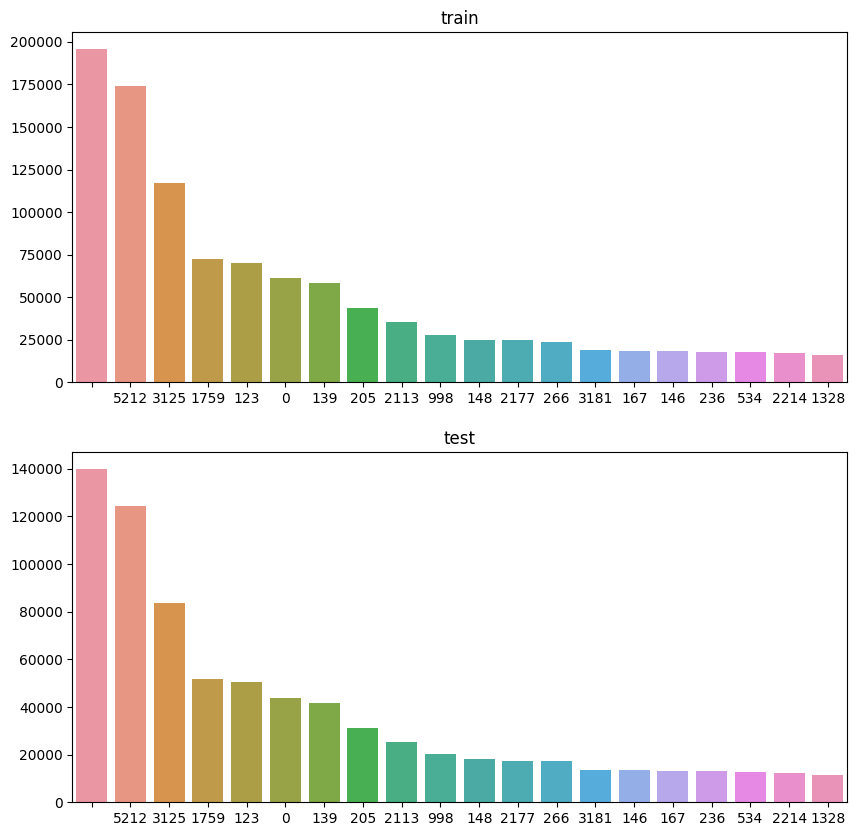

In [6]:
# 统计字符出现的频次并输出前10个最常见的字符
from collections import Counter

def word_count_plot(df, ax, title_name=''):
    counter = Counter()
    for content in df['content']:
        counter.update(content)
    print(counter.most_common(20))
    x, y = zip(*counter.most_common(20))
    sns.barplot(x=list(x), y=list(y), ax=ax)
    ax.set_title(title_name)

fig, (ax_train, ax_test) = plt.subplots(2, 1, figsize=(10, 10))

word_count_plot(train_data, ax_train, 'train')
word_count_plot(test_data, ax_test, 'test')

标签分布

([<matplotlib.patches.Wedge at 0x7f2ab7aadea0>,
 [Text(-0.5134133958006168, -0.9728343564104217, '0'),
  Text(0.513413350258953, 0.9728343804450365, '1')],
 [Text(-0.2800436704367001, -0.5306369216784118, '84.5%'),
  Text(0.2800436455957925, 0.5306369347882016, '15.5%')])

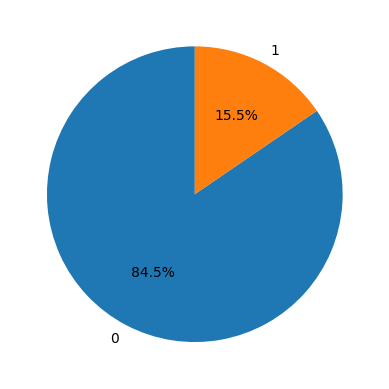

In [7]:
size, label = train_data['label'].value_counts().values, train_data['label'].value_counts().index
plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)


不同标签的词频分布

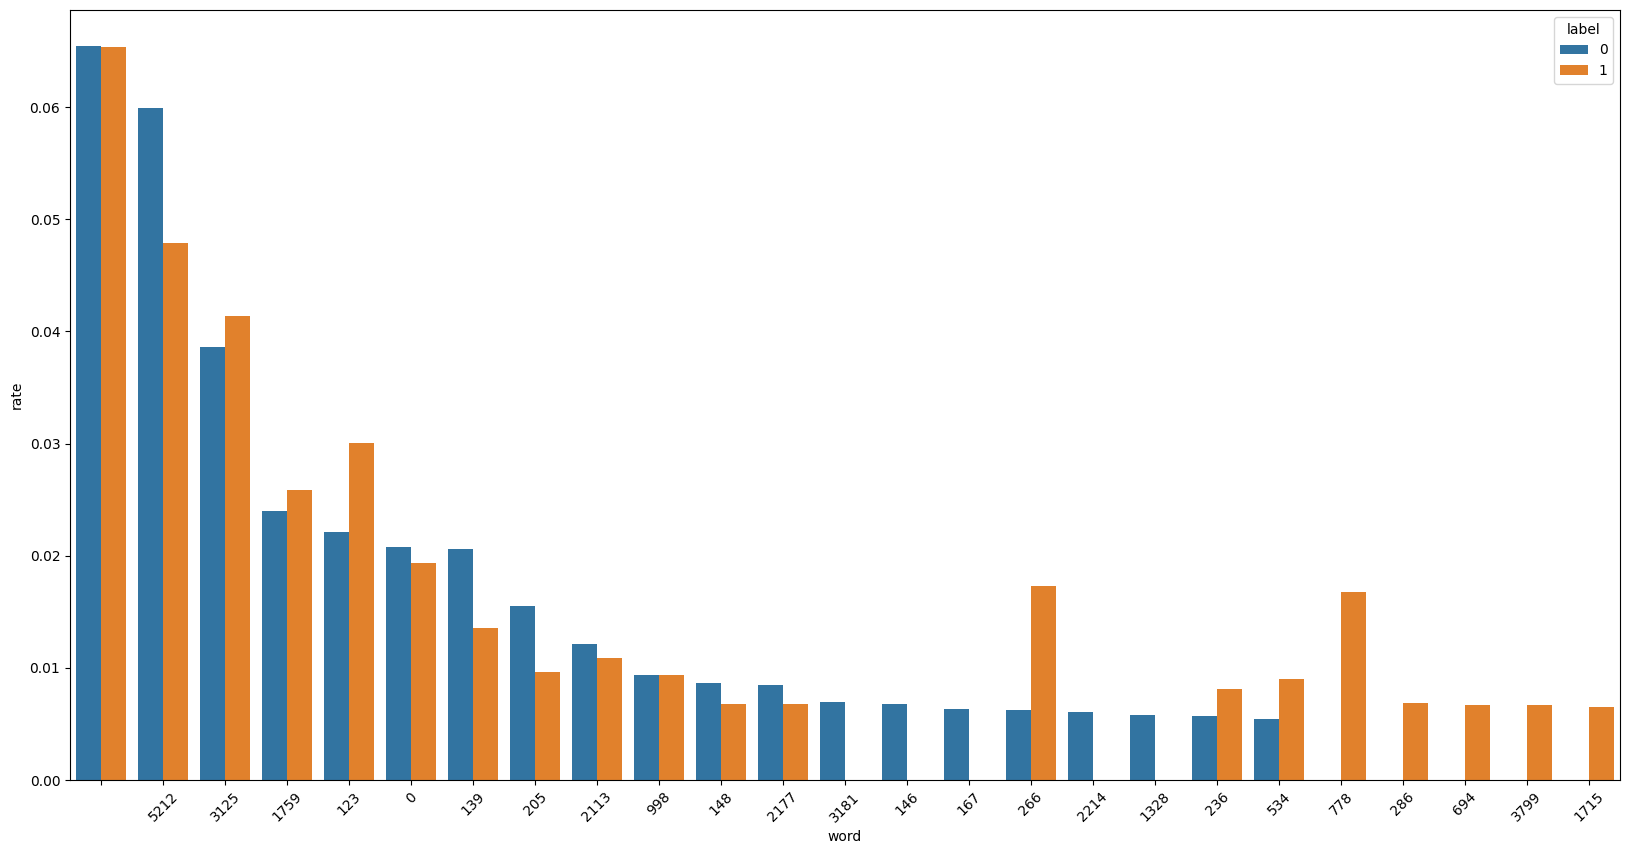

In [16]:
c = Counter()
for content in train_data[train_data['label'] == 0]['content']:
    c.update(content)
total = sum(c.values())
for k, v in c.items():
    c[k] = v / total

most_common_0 = pd.DataFrame(c.most_common(20), columns=['word', 'rate'])
most_common_0['label'] = 0

c.clear()
for content in train_data[train_data['label'] == 1]['content']:
    c.update(content)
total = sum(c.values())
for k, v in c.items():
    c[k] = v / total
most_common_1 = pd.DataFrame(c.most_common(20), columns=['word', 'rate'])
most_common_1['label'] = 1

df_plot = pd.concat([most_common_0, most_common_1], axis=0)

sns.barplot(x='word', y='rate', hue='label', data=df_plot)
plt.xticks(rotation=45)
# set 20 x 10
plt.rcParams['figure.figsize'] = (30, 10)

<Axes: xlabel='word', ylabel='count'>

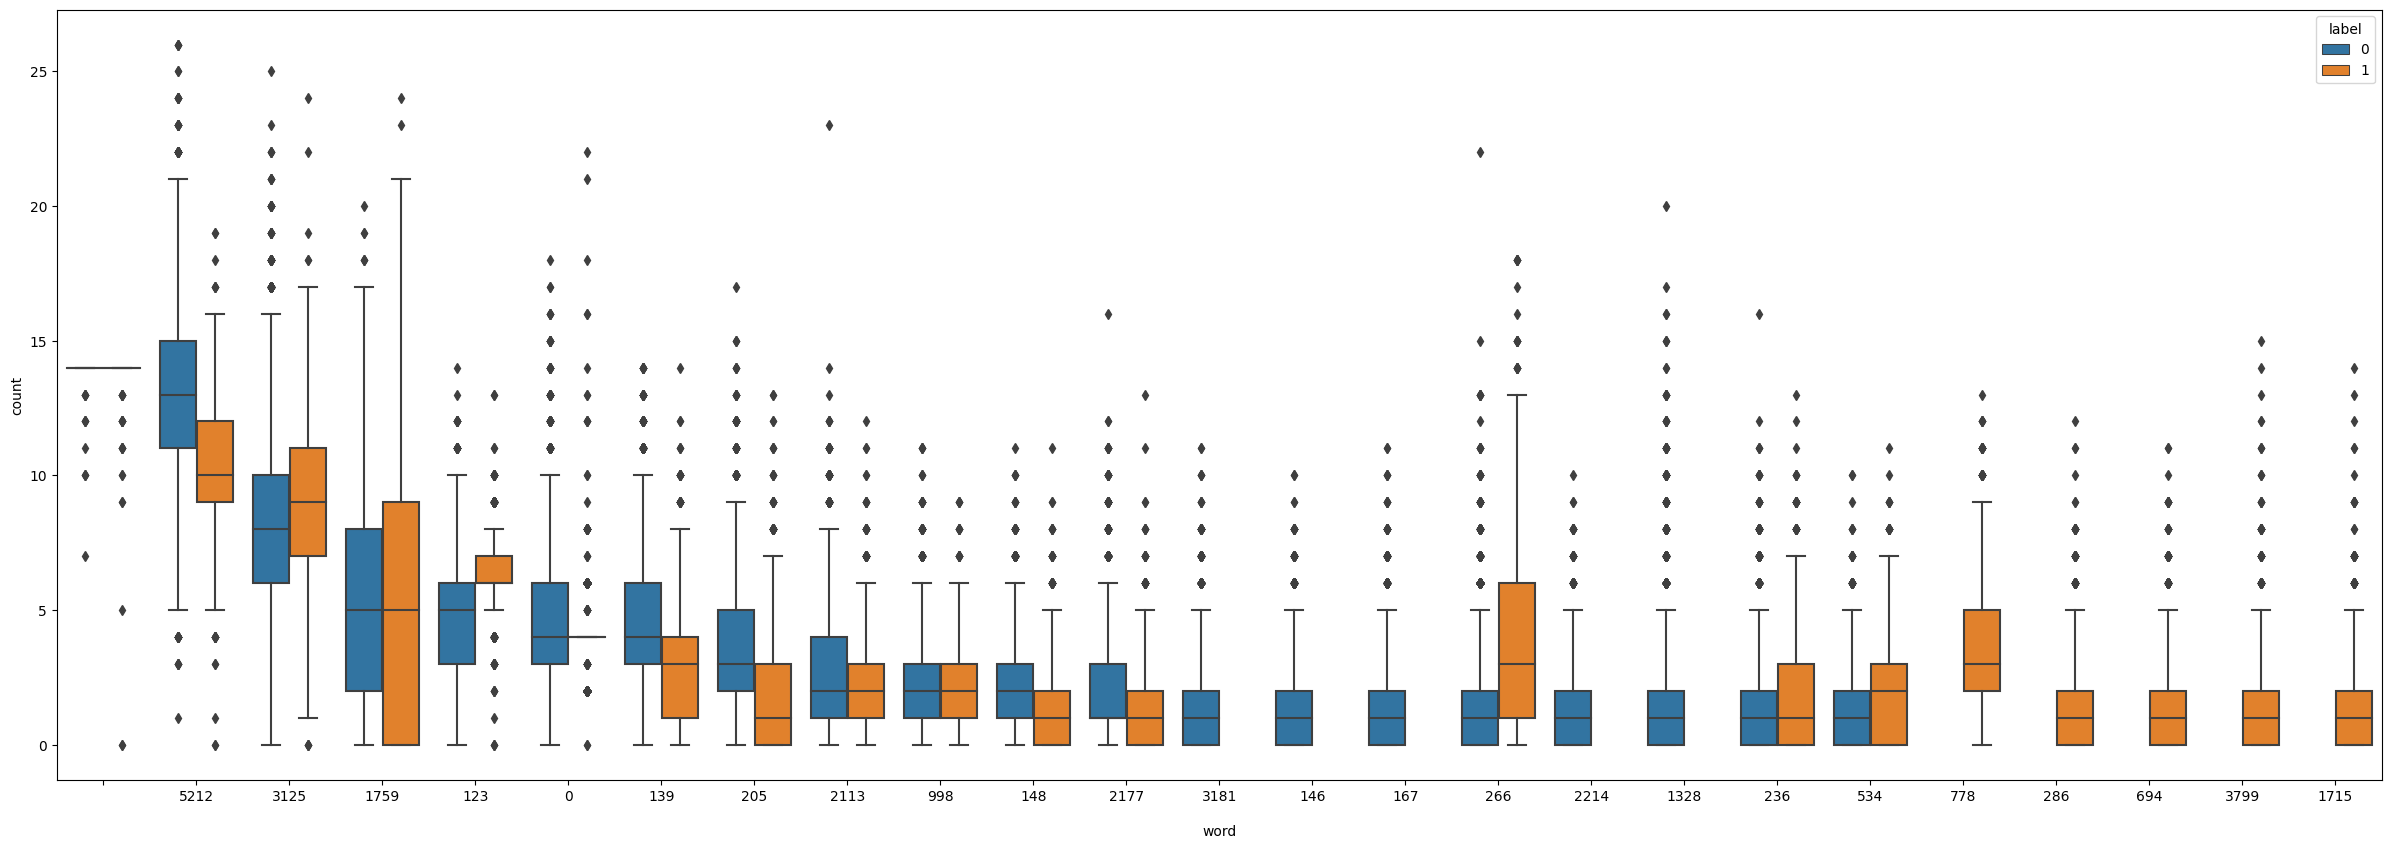

In [23]:

# fig, (ax_train, ax_test) = plt.subplots(2, 1, figsize=(10, 10))

# def plot_word_freq(df, ax, title_name=''):
#     c = Counter()
#     for content in df['content']:
#         c.update(content)

#     dic = {}
#     for item, count in c.most_common(20):
#         dic[item] = df['content'].apply(lambda x: x.count(item)).tolist()

#     sns.boxplot(data=pd.DataFrame(dic), ax=ax)
#     ax.set_title(title_name)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# plot_word_freq(train_data, ax_train, 'train')
# plot_word_freq(test_data, ax_test, 'test')

c = Counter()
for content in train_data[train_data['label'] == 0]['content']:
    c.update(content)

df_plot = pd.DataFrame(columns=['word', 'count', 'label'])
for item, count in c.most_common(20):
    df_tmp = pd.DataFrame()
    df_tmp['count'] = train_data[train_data['label'] == 0]['content'].apply(lambda x: x.count(item)).tolist()
    df_tmp['word'] = item
    df_tmp['label'] = 0
    df_plot = pd.concat([df_plot, df_tmp], axis=0)

c.clear()
for content in train_data[train_data['label'] == 1]['content']:
    c.update(content)

for item, count in c.most_common(20):
    df_tmp = pd.DataFrame()
    df_tmp['count'] = train_data[train_data['label'] == 1]['content'].apply(lambda x: x.count(item)).tolist()
    df_tmp['word'] = item
    df_tmp['label'] = 1
    df_plot = pd.concat([df_plot, df_tmp], axis=0)

sns.boxplot(x='word', y='count', hue='label', data=df_plot)

根据比例不同构建一个简单的分类器

In [33]:
submit = pd.DataFrame(columns=['name', 'label'])

def func(x):
    if '3181' in x:
        return 0
    elif '778' in x:
        return 1
    else:
        return 0
submit['name'] = test_data['name']
submit['label'] = test_data['content'].apply(lambda x: func(x))
submit.to_csv('data/submit.csv', index=False)

In [34]:
submit['label'].value_counts()

label
0    8109
1    1891
Name: count, dtype: int64